## Discretization
1. It is the process of transforming continuous variables by creating a set of contiguous intervals that span the range of the variable's values.
* <img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*uyCXA4IgTNpFc5iaDgvedA.png" height=150px>
2. It is also called as binning, where bin is an alternative name for the interval.
3. Use cases for binning are:-
   * To handle outliers
   * To improve the value spread
4. Eg. Consider the following values for age :- [5, 10, 23, 42, 57, 81, ... 100]
   * it can be classified into bins like :-
     0-10, 10-20, 20-30, ....


  

## Types of Discretization

1. Unsupervised
   * Equal width (uniform)
     * Calculated using (max-min)/bins
     * Each bins has equal width
     * Eg. (0-10), (10-20), ... (90-100), though no. elements in each bin could vary
     * <img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*YqOW2eLd2tIaBY2om8445A.png" height=150px>
     
   * Equal frequency (quantic)
     * Each bin length varies here, though no. of elements in each bin is same
     * Eg. intervals = 10
        * Each interval contains 10% of total observations
        * Intervals: 0-16, 16-20, 20-22, 22-25,.. 50-74
        * <img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*oX1dXyQ-RNkfOmMHT8uR-w.png" height=150px>
   * K means binning
2. Supervised
   * Decision tree binning
3. Custom binning
   * In it, Domain knowledge is used to encode numerical features
   * Example (Age attribute) :-
     * 0-16 -> Kids
     * 18-60 -> working
     * 60-80 -> Retire

## Sklearn's KBinsDiscretizer()
It takes the following attributes :-
1. n_bins = ? (no. of bins)
2. strategy :-
   * uniform (Equal width)
   * quantile (Equal frequency)
   * kmeans
3. encode :-
   * ordinal (Ranking matters)
   * Onehotencoding (Ranking does not matter)

## Binarization
* Transforms continuous variable into 2 classes
* Eg.
  * Annual income < 6L -> 0
  * Annual income > 6L -> 1


## Loading Dataset

In [1]:
import pandas as pd
df = pd.read_csv("train.csv", usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
# Dropping missing values
df.dropna(inplace=True)

## Train test split

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Survived', axis=1)
Y = df['Survived']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Applying Decision Tree before Discretization

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.6363636363636364

##Applying Binning

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
kbin = KBinsDiscretizer(n_bins=15, encode='ordinal', strategy='quantile')
#kbin = KBinsDiscretizer(n_bins=15, encode='ordinal', strategy='uniform')
#kbin = KBinsDiscretizer(n_bins=15, encode='ordinal', strategy='kmeans')

In [ ]:
from sklearn.compose import ColumnTransformer
trf = ColumnTransformer([
    ('first', kbin, [0]),
    ('second', kbin, [1])
])

In [ ]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [ ]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

## Applying Decision Tree after Discretization

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf, Y_train)
Y_pred = clf.predict(X_test_trf)
accuracy_score(Y_test, Y_pred)

0.6363636363636364

##Plotting Age and fare graphs

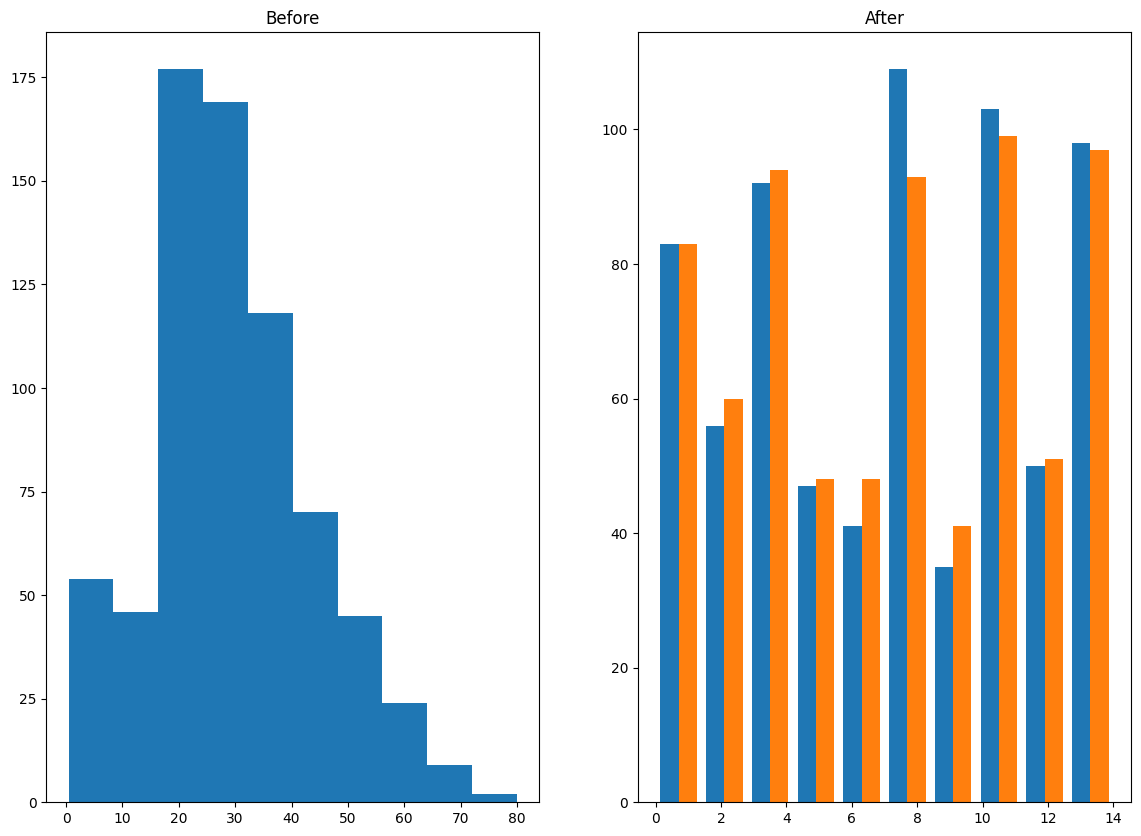

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
plt.subplot(1, 2, 1)
plt.hist(X['Age'])
plt.title("Before")

plt.subplot(1,2,2)
X_trf = trf.fit_transform(X)
plt.hist(X_trf)
plt.title("After")
plt.show()

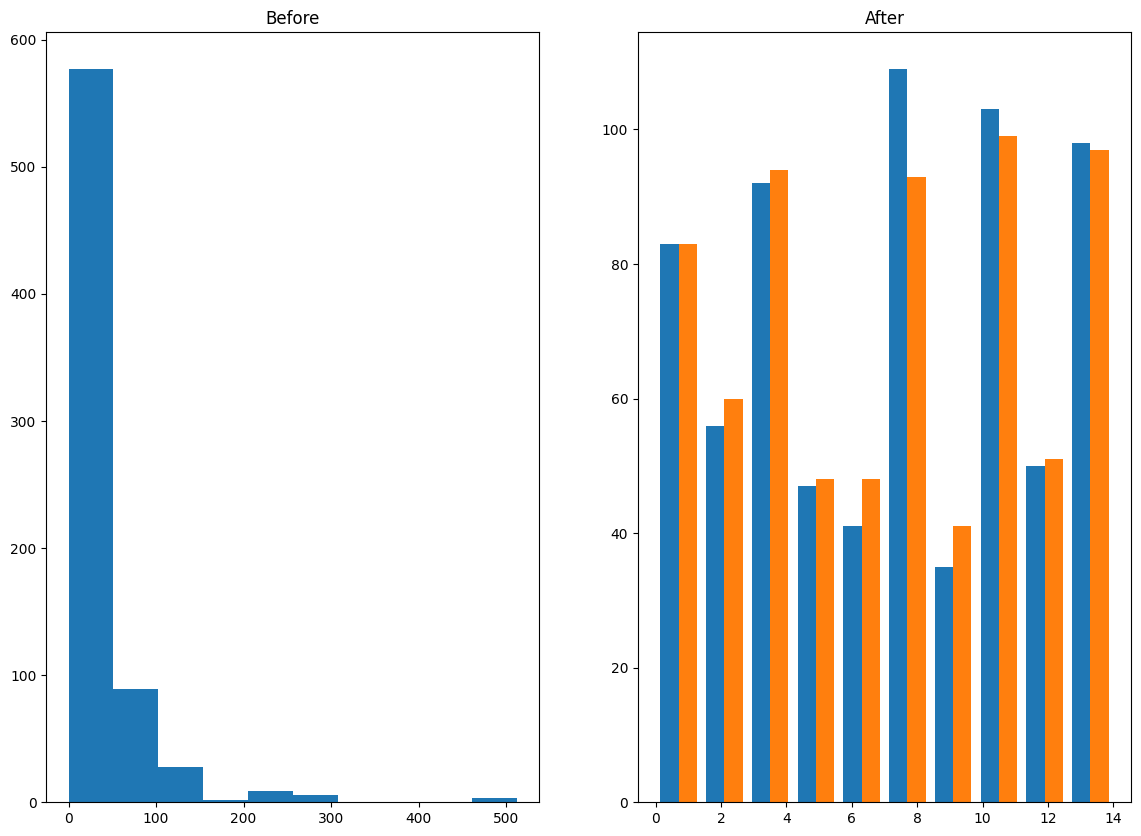

In [ ]:
plt.figure(figsize=(14, 10))
plt.subplot(1, 2, 1)
plt.hist(X['Fare'])
plt.title("Before")

plt.subplot(1,2,2)
X_trf = trf.fit_transform(X)
plt.hist(X_trf)
plt.title("After")
plt.show()

## Custom Discretization example

In [3]:
# Sample data
data = {'feature': [45988, 21407, 53523, 13798, 47381, 39692, 22158, 53671, 19062, 55924,
 51384, 10817, 47131, 53972, 32366]}

df = pd.DataFrame(data)

In [ ]:
# Function for custom Discretization
def custom_discretization(val):
  if val < 20000:
    return 'Low'
  elif 20000 <= val < 40000:
    return 'Average'
  else:
    return 'High'

In [ ]:
df['custom_bins'] = df['feature'].apply(custom_discretization)

<Axes: xlabel='custom_bins', ylabel='count'>

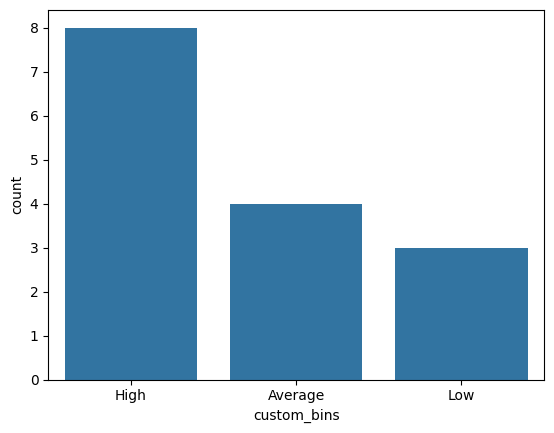

In [ ]:
import seaborn as sns
sns.countplot(x='custom_bins', data=df)

## Binarization

In [26]:
# Loading data
df = pd.read_csv("train.csv", usecols=['Age','Fare','SibSp','Parch','Survived'])
df.head()

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500


In [27]:
# Dropping columns with missing values
df.dropna(inplace=True)

In [28]:
# Creating a new family column
df['Family'] = df['SibSp'] + df['Parch']
df.head()

,Survived,Age,SibSp,Parch,Fare,Family
0,0,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,1
2,1,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,1
4,0,35.0,0,0,8.0500,0


In [29]:
# Dropping SibSp and Parch
df.drop(columns=['SibSp', 'Parch'], inplace=True)
df.sample(5)

,Survived,Age,Fare,Family
640,0,20.0,7.8542,0
187,1,45.0,26.5500,0
450,0,36.0,27.7500,3
320,0,22.0,7.2500,0
472,1,33.0,27.7500,3


<Axes: xlabel='Family', ylabel='count'>

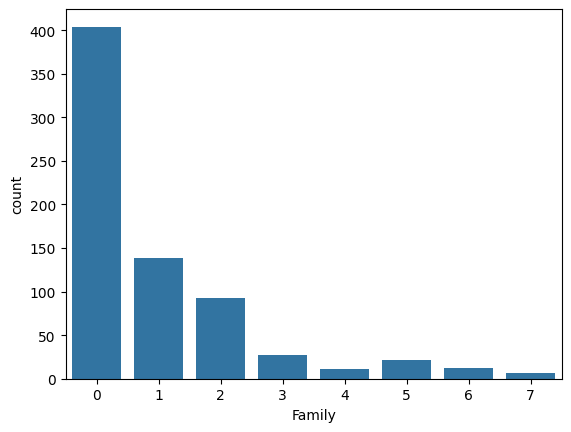

In [31]:
# Plotting countplot
import seaborn as sns
sns.countplot(x='Family', data=df)

In [32]:
# Train test split
from sklearn.model_selection import train_test_split

X = df.drop('Survived', axis=1)
Y = df['Survived']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [33]:
# Binarization
from sklearn.preprocessing import Binarizer
from sklearn.compose import ColumnTransformer

trf = ColumnTransformer([
    ('bin', Binarizer(copy=False), ['Family'])
], remainder='passthrough')

In [34]:
# Apply Binarization
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [35]:
df = pd.DataFrame(X_train_trf,columns=['family','Age','Fare'])
df.sample(10)

,family,Age,Fare
532,0.0,29.0,9.4833
464,1.0,45.0,27.9000
66,0.0,30.0,106.4250
537,0.0,25.0,7.6500
365,0.0,25.0,7.7750
258,1.0,35.0,53.1000
143,0.0,27.0,7.7958
287,0.0,40.0,7.8958
551,0.0,18.0,73.5000
254,1.0,31.0,18.0000


<Axes: xlabel='family', ylabel='count'>

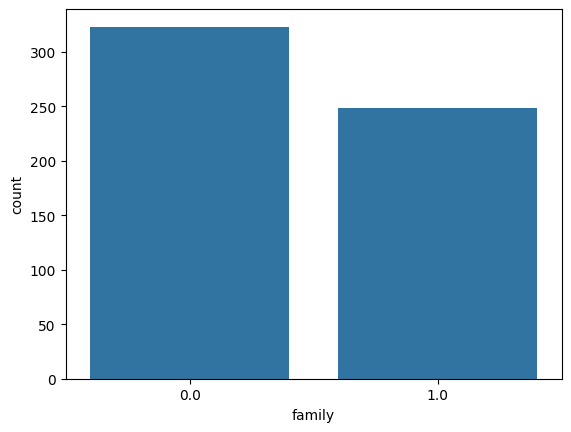

In [36]:
import seaborn as sns
sns.countplot(x='family', data=df)